In [1]:
!pip install razdel

In [2]:
!pip install pympi-ling

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import os, re
import pympi
from string import punctuation
from collections import Counter, defaultdict
from razdel import sentenize
from razdel import tokenize as razdel_tokenize
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
import numpy as np
import pandas as pd

def normalize(text):
    normalized_text = [word.text.strip(punctuation) for word \
                                                            in razdel_tokenize(text)]
    normalized_text = [word.lower() for word in normalized_text if word and len(word) < 20 ]
    return normalized_text

In [5]:
!wget https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip -O lenta.txt.zip
!unzip lenta.txt.zip

--2021-08-20 13:52:31--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5723675 (5.5M) [application/zip]
Saving to: ‘lenta.txt.zip’

lenta.txt.zip       100%[===================>]   5.46M  --.-KB/s    in 0.05s   

2021-08-20 13:52:32 (115 MB/s) - ‘lenta.txt.zip’ saved [5723675/5723675]

Archive:  lenta.txt.zip
  inflating: lenta.txt               
  inflating: __MACOSX/._lenta.txt    


In [ ]:
#!wget https://ruscorpora.ru/new/ngrams/3grams-3.zip -O 3grams-3.zip
#!unzip 3grams-3.zip

--2021-08-06 11:04:24--  https://ruscorpora.ru/new/ngrams/3grams-3.zip
Resolving ruscorpora.ru (ruscorpora.ru)... 82.148.12.99
Connecting to ruscorpora.ru (ruscorpora.ru)|82.148.12.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32452212 (31M) [application/zip]
Saving to: ‘3grams-3.zip’

3grams-3.zip        100%[===================>]  30.95M  7.26MB/s    in 4.3s    

2021-08-06 11:04:29 (7.26 MB/s) - ‘3grams-3.zip’ saved [32452212/32452212]

Archive:  3grams-3.zip
  inflating: 3grams-3.txt            


In [ ]:
!wget https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip -O habr_texts.txt.zip
!unzip habr_texts.txt.zip

In [ ]:
!ls -lsha

total 215M
4.0K drwxr-xr-x 1 root root 4.0K Aug  6 11:15 .
4.0K drwxr-xr-x 1 root root 4.0K Aug  6 10:37 ..
158M -rw-r--r-- 1 root root 158M Nov  1  2011 3grams-3.txt
 31M -rw-r--r-- 1 root root  31M Aug  3 17:55 3grams-3.zip
4.0K drwxr-xr-x 4 root root 4.0K Jul 16 13:19 .config
 21M -rw-r--r-- 1 root root  21M Nov 15  2020 lenta.txt
5.5M -rw-r--r-- 1 root root 5.5M Aug  6 11:15 lenta.txt.zip
4.0K drwxr-xr-x 2 root root 4.0K Aug  6 11:15 __MACOSX
4.0K drwxr-xr-x 1 root root 4.0K Jul 16 13:20 sample_data


In [6]:
with open('lenta.txt', 'r', encoding='utf-8') as f:
    lenta = f.read()

#lenta = lenta[:50000]

In [7]:
lenta[:500]

'Бои у Сопоцкина и Друскеник закончились отступлением германцев. Неприятель, приблизившись с севера к Осовцу начал артиллерийскую борьбу с крепостью. В артиллерийском бою принимают участие тяжелые калибры. С раннего утра 14 сентября огонь достиг значительного напряжения. Попытка германской пехоты пробиться ближе к крепости отражена. В Галиции мы заняли Дембицу. Большая колонна, отступавшая по шоссе от Перемышля к Саноку, обстреливалась с высот нашей батареей и бежала, бросив парки, обоз и автомоб'

In [ ]:
# количество токенов в корпусе
len(normalize(lenta))

KeyboardInterrupt: ignored

Мы хотим сделать корпус на 10 миллионов слов..

In [ ]:
with open('mal_hik_so_spagoi.txt', 'r', encoding='utf-8') as f:
    spaga = f.read()

with open('nabokov.txt', 'r', encoding='utf-8') as f:
    nabokov = f.read()

with open('wiki_data.txt', 'r', encoding='utf-8') as f:
  wiki = f.read()

In [8]:
with open('wiki_data.txt', 'r', encoding='utf-8') as f:
  wiki = f.read()

In [9]:
!unzip Разметки.zip

Archive:  Разметки.zip
  inflating: Разметки/маленький_дед_мороз_ККД.eaf  
  inflating: Разметки/золушка_сцена_1_ВПР.eaf  
  inflating: Разметки/набор текста_СИШ.eaf  
  inflating: Разметки/Сокол_5_ААС.eaf  
  inflating: Разметки/Золушка_сцена_5_ВПР.eaf  
  inflating: Разметки/Гилберт_КАК.eaf  
  inflating: Разметки/Золушка_сцена_6_ВПР.eaf  
  inflating: Разметки/Животные_убийцы_СГБ.eaf  
  inflating: Разметки/времена_года_ККД.eaf  
  inflating: Разметки/золушка_сцена_2_ВПР.eaf  
  inflating: Разметки/ПЭ_СГБ.eaf  
  inflating: Разметки/соловей_и_роза_часть_5_СГБ.eaf  
  inflating: Разметки/публикации_АМК.eaf  
  inflating: Разметки/Ашуркова_2_АРП.eaf  
  inflating: Разметки/ковид_ААС.eaf  
  inflating: Разметки/как удержать счастье_СИШ.eaf  
  inflating: Разметки/дпржя_АМК.eaf  
  inflating: Разметки/энергия_пищи_СГБ.eaf  
  inflating: Разметки/остеопатия_СГБ.eaf  
  inflating: Разметки/соловей_и_роза_часть_4_СГБ.eaf  
  inflating: Разметки/Салий_4_АМК.eaf  
  inflating: Разметки/Накоп

In [10]:
class DataToList:
    # TODO: support files with two signers
    def __init__(self, full_filename):
        self.eaf = pympi.Elan.Eaf(full_filename)
        if len(self.eaf.get_tier_names()) > 5:
            self.second_person = True
        else:
            self.second_person = False

    def read_data_rus(self):
        eaf_form = self.eaf.get_annotation_data_for_tier("Перевод")
        rus_sentences = []

        if eaf_form:
            for sign in eaf_form:
                # [0] is start time of annotation, [1] is end time
                russian = (sign[0], sign[1], sign[2])
                rus_sentences.append(russian)

        # print(rus_sentences)
        return rus_sentences

    def read_data_rsl(self):
        rus = self.read_data_rus()
        rsl_sentences_raw = []
        for sentence_rus in rus:
            sentence = []
            eaf_form_gloss = self.eaf.get_annotation_data_between_times("ПР-глосс",
                                                                   sentence_rus[0] - 2,
                                                                   sentence_rus[1] + 2)
            if eaf_form_gloss:
                # 2 - не время, а текст аннотации
                for word in eaf_form_gloss:
                    new_word = word[2].lower()

                    # проверить на дактиль и заменить его на <UNK> токен
                    if re.match(r'.(-.)+', new_word):
                        sentence.append('<unk>')
                        continue

                    # проверить есть ли согласование
                    ending = ''
                    if ':' in new_word:
                        if new_word[1:].lower().startswith('ps'):
                            sentence.append(new_word[:4])
                            new_word = new_word[4:]
                        if new_word.lower().endswith('pl'):
                            ending = ':pl'
                            new_word = new_word[:-3]
                        if new_word.lower().endswith('ps'):
                            ending = new_word[-4:]
                            new_word = new_word[:-4]
                        sentence.append(new_word)
                        if ending != '':
                            sentence.append(ending)
                    else:
                        sentence.append(new_word)
            else:
                print("ERROR ERROR для предложения нет глосс ERROR ERROR")
            rsl_sentences_raw.append(sentence)

        # этот разделитель токенов - костыль, чтобы можно было использовать токенизацию
        # через пайплайн Field > TabularDataset > Iterator
        # То есть РЖЯ уже токенизирован, но это придется сделать еще раз
        rsl_sentences_raw = ['%>%'.join(s) for s in rsl_sentences_raw]
        # print(rsl_sentences_raw)
        return rsl_sentences_raw


def read_elan_files(elan_file_path):
    # Read elan files into two lists of sentences
    rus_sentences, rsl_sentences = [], []
    for dir_path, dir_names, filenames in os.walk(elan_file_path):
        print(filenames)
        for filename in filenames:
            if filename.endswith('.eaf'):
                full_filename = os.path.join(dir_path, filename)
                rus = [sentence[2] for sentence in DataToList(full_filename).read_data_rus()]
                rsl = DataToList(full_filename).read_data_rsl()
                rus_sentences.extend(rus)
                rsl_sentences.extend(rsl)
    return rus_sentences, rsl_sentences

In [11]:
rus, rsl = read_elan_files(".")

['rsl_svo_50.tsv', 'wiki_data.txt', 'Разметки.zip', 'lenta.txt', 'lenta.txt.zip']
['.last_update_check.json', 'config_sentinel', 'active_config', 'gce', '.last_survey_prompt.yaml', '.last_opt_in_prompt.yaml']
[]
['13.34.42.905647.log', '13.35.23.554803.log', '13.35.22.830760.log', '13.34.59.322293.log', '13.34.24.204370.log', '13.35.05.184494.log']
['config_default']
['Соловейчик 2_ААС.eaf', '3д_слим_КАК.eaf', 'Салий_4_АМК.eaf', 'Первая_помощь_1_ККД.eaf', 'маленький_дед_мороз_ККД.eaf', 'плюшевый_кролик_КАК.eaf', 'Кто_входит_в_сообщество_глухих_ККД.eaf', 'Сокол_5_ААС.eaf', 'Сокол_7_СГБ.eaf', 'ковид_ААС.eaf', 'дпржя_АМК.eaf', 'Сказка_про_гусеничку_АЕГ.eaf', 'как удержать счастье_СИШ.eaf', 'зима_на_юге_ВПР.eaf', 'Финский_поиск_ККД.eaf', 'Берлизова_5_ДАС.eaf', 'Связь_глухих_2_ККД.eaf', 'Лиза_Жидкова_ОСБ.eaf', 'Животные_убийцы_СГБ.eaf', 'похудение_СГБ.eaf', 'Исаев_4_АМК.eaf', 'Сокол_1_ВПР.eaf', 'Берлизова_2_АВК.eaf', 'Мира_адаптис_КАК.eaf', '1_и_9_мая_КАК.eaf', 'надоесть_КАК.eaf', 'Накоплен

In [ ]:
with open('habr_texts.txt', 'r', encoding='utf-8') as f:
    habr = f.read()

In [12]:
all_texts = lenta + '\n' + wiki # spaga + '\n' + nabokov  # + '\n' + habr  # + '\n' + wiki

Вот мы прочитали данные (новостные тексты ленты), теперь мы можем сделать фейковые предложения на русском языке, например, на триграммах

In [ ]:
def ngrammer(tokens, n=3):
    ngrams = []
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

def create_ngrams(sentences):
    unigrams, bigrams, trigrams = Counter(), Counter(), Counter()
    for sentence in sentences:
        unigrams.update(sentence)
        bigrams.update(ngrammer(sentence, n=2))
        trigrams.update(ngrammer(sentence, n=3))
    return unigrams, bigrams, trigrams

In [ ]:
sentences_news = [ ['<start>'] + ['<start>'] + normalize(text) + ['<end>'] for text in sent_tokenize(all_texts)]

unigrams_news, bigrams_news, trigrams_news = create_ngrams(sentences_news)

In [ ]:
len(sentences_news)

305528

In [ ]:
def create_matrix_old(unigrams, bigrams, trigrams):
    matrix_trigrams = np.zeros((len(bigrams), len(unigrams)))
    matrix_bigrams = np.zeros((len(unigrams), len(unigrams)))
    id2bigram = list(bigrams)
    bigram2id  =  {bigram:i for i, bigram in enumerate(id2bigram)}
    id2word = list(unigrams)
    word2id = {word:i for i, word in enumerate(id2word)}
    for ngram in trigrams:
        ngram_ = ngram.split(' ')
        bigram, unigram = ' '.join(ngram_[:-1]), ngram_[-1]
        matrix_trigrams[bigram2id[bigram]][word2id[unigram]] =  (trigrams[ngram] / bigrams[bigram])
    for ngram in bigrams:
        word1, word2 = ngram.split(' ')
        matrix_bigrams[word2id[word1]][word2id[word2]] =  (bigrams[ngram] / unigrams[word1])
    return matrix_trigrams, matrix_bigrams, id2bigram, bigram2id, id2word, word2id

In [ ]:
list(trigrams_news)[:5]

['<start> <start> бои',
 '<start> бои у',
 'бои у сопоцкина',
 'у сопоцкина и',
 'сопоцкина и друскеник']

In [ ]:
# bigram2id_news
{bigram:i for i, bigram in enumerate(list(bigrams_news)[:10])}

{'<start> <start>': 0,
 '<start> бои': 1,
 'бои у': 2,
 'германцев <end>': 9,
 'друскеник закончились': 6,
 'закончились отступлением': 7,
 'и друскеник': 5,
 'отступлением германцев': 8,
 'сопоцкина и': 4,
 'у сопоцкина': 3}

In [ ]:
trigrams_news['30 раненых в']/bigrams_news['30 раненых']

0.5

In [ ]:
def create_matrix(unigrams, bigrams, trigrams):
    # matrix_trigrams = np.zeros((len(bigrams), len(unigrams)))
    # matrix_bigrams = np.zeros((len(unigrams), len(unigrams)))
    dict_trigrams = defaultdict(int)

    id2bigram = list(bigrams)
    bigram2id  =  {bigram:i for i, bigram in enumerate(id2bigram)}
    id2word = list(unigrams)
    word2id = {word:i for i, word in enumerate(id2word)}
    for ngram in trigrams:
        ngram_ = ngram.split(' ')
        bigram, unigram = ' '.join(ngram_[:-1]), ngram_[-1]
        # bigram бои у || unigram сопоцкина
        # matrix_trigrams[bigram2id[bigram]][word2id[unigram]] =  (trigrams[ngram] / bigrams[bigram])
        dict_trigrams[bigram + '_' + unigram] = (trigrams[ngram] / bigrams[bigram])
    #for ngram in bigrams:
    #    word1, word2 = ngram.split(' ')
    #    matrix_bigrams[word2id[word1]][word2id[word2]] =  (bigrams[ngram] / unigrams[word1])
    return dict_trigrams, id2bigram, bigram2id, id2word, word2id  # matrix_bigrams

In [ ]:
dict_trigrams_news, id2bigram_news, bigram2id_news, id2word_news, word2id_news = create_matrix(unigrams_news, bigrams_news, trigrams_news)

In [ ]:
dict_trigrams_news

In [ ]:
'<start> <start>' + '_' + 'агентство' in dict_trigrams_news.keys()

True

In [ ]:
# list of unigrams
id2word_news[3]

'сопоцкина'

In [ ]:
id2bigram_news

In [ ]:
def trigrams_generator_old(matrix, id2word, ngram2id, id2ngram, n=100, start='<start> <start>'):
    text = []
    current_idx = ngram2id[start]
    for i in range(n):
        chosen = np.random.choice(matrix.shape[1], p=matrix[current_idx])
        text.append(id2word[chosen])
        if id2word[chosen] == '<end>':
            token = start
        else:
            token = id2ngram[current_idx].split()[-1] + " " + id2word[chosen]
        current_idx = ngram2id[token]
    return ' '.join(text)

In [ ]:
def trigrams_generator(dict_grams, id2word, ngram2id, id2ngram, n=50, start='<start> <start>'):
    text = []
    current_idx = ngram2id[start]
    current_token = start

    for i in range(n):
        # chosen = np.random.choice(matrix.shape[1], p=matrix[current_idx])
        probs = [dict_grams[current_token + '_' + word] if current_token + '_' + word in dict_grams.keys() else 0.0 for word in id2word]
        chosen = np.random.choice(len(id2word), p=probs)
        text.append(id2word[chosen])
        if id2word[chosen] == '<end>':
            current_token = start
        else:
            # get current bigram, get last word of current bigram, glue last word of bigram + chosen token
            current_token = id2ngram[current_idx].split()[-1] + " " + id2word[chosen]
        current_idx = ngram2id[current_token]
    return ' '.join(text)

In [ ]:
from pprint import pprint

print(trigrams_generator(dict_grams=dict_trigrams_news, id2word=id2word_news, ngram2id=bigram2id_news, id2ngram=id2bigram_news).replace('<end>', '\n'))

получился эскадрон из двенадцати претендентов ранее заявивших о намерении приобрести orange также заявили испанская telefonica американская mci worldcom уже заявили что находка представляет собой нежную и влажную ткань а также физически здоровые люди скрывающиеся в аргунскомущелье обстреляли заставу нижнее джари итум-калинского отряда охраняющего чеченский участок границы обнаружили в пятницу владимир


Теперь нужно сделать датасет для классификатора, где 1 - это русский, 0 - какая-то фигня. Для этого нужно понять сколько у меня будет хороших предложений. И сделать столько же плохих.

Для хороших предложений я буду использовать русские предложения из реальных разметок + нграммные предложения. Русских предложений из разметок 3003 (пока). Допустим я хочу около 100к предложений каждого типа.

# Так это всё была какая-то хрень

Надо попробовать марковские цепи

Начинаем опять с "матрицы". В ней должны оказаться условные вероятности

In [ ]:
def create_dict(unigrams, bigrams):
    # matrix_bigrams = np.zeros((len(unigrams), len(unigrams)))
    dict_pairs = defaultdict(int)

    #id2bigram = list(bigrams)
    #bigram2id  =  {bigram:i for i, bigram in enumerate(id2bigram)}
    #id2word = list(unigrams)
    #word2id = {word:i for i, word in enumerate(id2word)}

    for ngram in bigrams:
        word1, word2 = ngram.split(' ')
        dict_pairs[word1 + '_' + word2] = (bigrams[ngram] / unigrams[word1])
        # matrix_bigrams[word2id[word1]][word2id[word2]] =  (bigrams[ngram] / unigrams[word1])
    return dict_pairs  #, id2bigram, bigram2id, id2word, word2id  

In [ ]:
sentences_news = [['<start>'] + normalize(text) + ['<end>'] for text in sent_tokenize(all_texts)]

In [ ]:
unigrams, bigrams = Counter(), Counter()
for sentence in sentences_news:
  unigrams.update(sentence)
  bigrams.update(ngrammer(sentence, n=2))

In [ ]:
dict_pairs_markov = create_dict(unigrams, bigrams)

In [ ]:
dict_pairs_markov

Преположим у нас есть предложение "Привет как ты?". Какая вероятность у этого предложения\последовательности в нашем языке?

In [ ]:
example_sentence = "Привет как ты?"
normalized_sentence = ['<start>'] + normalize(example_sentence) + ['<end>']
normalized_sentence

['<start>', 'привет', 'как', 'ты', '<end>']

Все предложения начинаются со `<start>`, поэтому вероятность `P('<start>') = 1`. У нас в формуле будет перемножение вероятностей, единичка ничего не привносит в перемножение, поэтому дальше я ее буду просто опускать. Просто перемножаем вероятности из transition matrix, в нашем случае словарь.

In [ ]:
p = 1
for current_word, next_word in zip(normalized_sentence[0:-1], normalized_sentence[1:]):
  key = current_word + '_' + next_word
  if key in dict_pairs_markov:
    p = p * dict_pairs_markov[key]
  else:
    p = 0

In [ ]:
p

0.0

Че-то от этого нуля не выходит никуда уйти. Получается этот метод ничем не отличается от того, чтобы просто загуглить существовало ли такое предложение уже хоть раз в яндексе.

Можно всё-таки попробовать смотреть вероятность на основе нашего языка прийти из слова "привет" в слово "ты".

In [ ]:
id2word = list(unigrams)
start_token = normalize(example_sentence)[0]

probs_next = np.array([dict_pairs_markov[start_token + '_' + word] if start_token + '_' + word in dict_pairs_markov.keys() else 0.0 for word in id2word])

In [ ]:
end_token = normalize(example_sentence)[-1]
probs_before = np.array([dict_pairs_markov[word + '_' + end_token] if word + '_' + end_token in dict_pairs_markov.keys() else 0.0 for word in id2word])

In [ ]:
np.sum(np.multiply(probs_next, probs_before))

0.0

In [ ]:
# for quick testing
sentences_news = [normalize(text) for text in sent_tokenize(all_texts)]

unigrams, bigrams = Counter(), Counter()
for sentence in sentences_news:
  unigrams.update(sentence)
  bigrams.update(ngrammer(sentence, n=2))

dict_pairs_markov = create_dict(unigrams, bigrams)

id2word = list(unigrams)

In [ ]:
bigrams

In [ ]:
# for quick testing 

example_sentence = "как ты проводишь время"
start_token = normalize(example_sentence)[0]
end_token = normalize(example_sentence)[-1]

probs_next = np.array([dict_pairs_markov[start_token + '_' + word] if start_token + '_' + word in dict_pairs_markov.keys() else 0.0 for word in id2word])

probs_before = np.array([dict_pairs_markov[word + '_' + end_token] if word + '_' + end_token in dict_pairs_markov.keys() else 0.0 for word in id2word])

# final probability
np.sum(np.multiply(probs_next, probs_before))

0.0015879365842646931

### Найдем порог вероятности, с котороого мы начинаем считать, что предложение норм

Теперь скажем, что у нас есть реальные предложения из разметок и их вероятность на основе ленты+вики -- это порог.

In [ ]:
def sentence_probability(example_sentence, id2word, dict_pairs_markov):
  #norm_sentence = normalize(example_sentence)
  start_token = example_sentence[0]
  end_token = example_sentence[-1]

  probs_next = np.array([dict_pairs_markov[start_token + '_' + word] if start_token + '_' + word in dict_pairs_markov.keys() else 0.0 for word in id2word])

  probs_before = np.array([dict_pairs_markov[word + '_' + end_token] if word + '_' + end_token in dict_pairs_markov.keys() else 0.0 for word in id2word])

  # final probability
  return np.sum(np.multiply(probs_next, probs_before))

Если предложение длины 1, то его вероятность берем либо из униграммов. Либо, если это слово еще не встречалось всегда даем ему вероятность 1 делить на длину корпуса. Само слово я не прибавляю к длине корпуса, потому что корпус гигантский и это бессмысленно в принципе.

Если предложение длины 0 (да, есть и такой баг в данных), то и его вероятность тоже 0.

In [ ]:
# вот это больше запускать не надо, вероятности я себе уже выписала
real_probs = []
for sentence in tqdm(rus):
  norm_sentence = normalize(sentence)
  if sentence == '':
    real_probs.append(0.0)
  elif len(norm_sentence) == 1:
    word = norm_sentence[0]
    if word in unigrams:
      p = unigrams[word] / len(unigrams)
      real_probs.append(p)
    else:
      real_probs.append(1 / len(unigrams))
  else:
    real_probs.append(sentence_probability(norm_sentence, id2word, dict_pairs_markov))

In [ ]:
print(rus[:3], real_probs[:3])

['Здравствуйте!', 'В понедельник мы будем проводить прямой эфир.', 'Тема будет очень интересная.'] [1.6065842412446898e-05, 4.31450406087114e-06, 1.4784495555923636e-05]


In [ ]:
real_probs = np.array(real_probs)

In [ ]:
print("Mean ", np.mean(real_probs))
print("Median ", np.median(real_probs))
print("Min and max ", np.amin(real_probs), np.amax(real_probs))
print("Standard deviation", np.std(real_probs))

Mean  0.00022940774029484303
Median  7.605469604979296e-06
Min and max  0.0 0.06036558934985557
Standard deviation 0.0018035575230269357


Mean  0.00022940774029484303

Median  7.605469604979296e-06

Min and max  0.0 0.06036558934985557

Standard deviation 0.0018035575230269357

**Медиана, прям очень сильно меньше среднего значения, поэтому, я думаю, как порог надо брать именно медиану, иначе куча хороших предложений отсеивается.**

Попробуем отсеить так какой-нибудь из файлов. Я сохраню все предложения в два отдельных файла, чтобы отсмотреть глазами как произошло разделение и устраивает ли нас такое качество. 

Я ожидаю, что в файле с хорошими предложениями будет гораздо меньше данных. Саша предположил соотношение 1 к 5.

In [ ]:
rsl_svo_50 = pd.read_csv("rsl_svo_50.tsv", sep="\t", names=['rsl', 'rus'])
rsl_svo_50.head()

FileNotFoundError: ignored

In [ ]:
len(rsl_svo_50)

1454466

In [ ]:
threshold = 0.00022940774029484303
good = 0
for sentence in tqdm(rsl_svo_50.rus):
  norm_sentence = normalize(sentence)
  p = sentence_probability(norm_sentence, id2word, dict_pairs_markov)
  if p > threshold:
    good += 1
    print("\n" + sentence)
print(good)

In [ ]:
good/11769

0.013934913756478885

# Классификатор

In [13]:
!nvidia-smi

Fri Aug 20 14:00:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
import torch
# check if cuda is on
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False

True

In [15]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

Сначала мне надо сложить мои предложения в датафреймчик, где правильных\неправильных предложений 20\80

Это **реальные** предложения на русском из разметок:

In [16]:
from pprint import pprint

pprint(rus[:4])

['Почему?',
 'Потому что важно чтобы ребенок с рождения начал впитывать в себя 2 языка.',
 'Если родители слабо говорят на жестовом языке и дают мало информарции, то '
 'ребенок не сможет воспринимать 2 язык и ему будет трудно перестраиваться с '
 'русского на жестовый.',
 'Либо родители не отдают всего себя ребенку и не объясняют смысл слов на '
 'жестовом языке.']


Какая **длина предложений** из разметок?

In [17]:
min(map(len, rus))

0

In [18]:
max(map(len, rus))

307

Это **реальные** предложения из русских текстов:

In [19]:
rus_sentences = sent_tokenize(all_texts)

In [20]:
pprint(rus_sentences[:4])

['Бои у Сопоцкина и Друскеник закончились отступлением германцев.',
 'Неприятель, приблизившись с севера к Осовцу начал артиллерийскую борьбу с '
 'крепостью.',
 'В артиллерийском бою принимают участие тяжелые калибры.',
 'С раннего утра 14 сентября огонь достиг значительного напряжения.']


Это **фейковые** предложения, которые надо проверять:

In [21]:
rsl_svo_50 = pd.read_csv("rsl_svo_50.tsv", sep="\t", names=['rsl', 'rus'])
rsl_svo_50.head()

,rsl,rus
0,ювелир говорить на жестовом языке цвет,Ювелир говорить на жестовом языке цвет.
1,ювелир говорить на жестовом языке будущие роди...,Ювелир говорить на жестовом языке будущие роди...
2,ювелир говорить на жестовом языке миллиард,Ювелир говорить на жестовом языке миллиард.
3,ювелир говорить на жестовом языке ноль,Ювелир говорить на жестовом языке ноль.
4,ювелир говорить на жестовом языке боль,Ювелир говорить на жестовом языке боль.


Сколько всего у нас **реальных** предложений?

In [22]:
len(rus) + len(rus_sentences)

283366

283366 - это 0.2 от всех данных. 

```
283366 - 0.2
x - 0.8
```

In [23]:
len_broken = (283366 * 0.8) / 0.2
len_broken

1133464.0

Теперь я создаю словарь, чтобы из него рандомно выбирать слова для генерации плохих нерусских предложений:

In [24]:
real_rus = rus + rus_sentences
len(real_rus)

283366

In [25]:
len_broken / len(real_rus)

4.0

In [26]:
# too long ineffective 1.27 
vocab = Counter()
for sentence in tqdm(real_rus):
  tokens = normalize(sentence)
  vocab.update(tokens)

100%|██████████| 283366/283366 [01:25<00:00, 3329.05it/s]


Теперь можно генерировать плохие предложения, чтобы они составляли большую часть данных для обучения. Типа приближаем соотношение к тому как в реальной жизни

In [27]:
import random

In [ ]:
# long & ineffective, too much memory needed
#fake_sentences = []
#i = 0
#for i in tqdm(range(int(len_broken))):
  # из vocab случайно выбирать N слов, где N - это длина от 3 до 100 (307 это всё-таки слишком много)
#  n = random.choice(range(100))
#  fake_sentence = random.sample(vocab.keys(), n)
#  fake_sentences.append(fake_sentence)
#  i += 1

 59%|█████▊    | 665173/1133464 [1:53:36<1:33:49, 83.18it/s]

Колаб осилил только 665173 из 1133464 предложений. Надо сразу в файл их записывать и запускать батчами.

Или не делать огромный словарь а поперемешивать слова из исходных предложений

In [53]:
from string import punctuation
from razdel import tokenize
import torch.optim as optim
from sklearn.metrics import classification_report

Код ниже собирает непонятный микс слов в предложение с большой буквы и с знаками препинания.

In [32]:
print(real_rus[11])
# need to save last punctuation sign
splitted_rus = [_.text for _ in list(tokenize(real_rus[11].lower()))]
print(' '.join(random.choices(splitted_rus[:-1], k=10)).capitalize() + splitted_rus[-1])

Поэтому до 3 лет вы должны давать все слова.
Поэтому слова вы лет должны 3 должны давать вы слова.


In [33]:
# 01.58
from random import randint as rint
fake_sentences = []
for sentence in tqdm(real_rus):
    splitted_rus = [_.text for _ in list(tokenize(sentence.lower()))]
    if len(splitted_rus) > 1:
        for _ in range(4):
            fake_sentence = ' '.join(random.choices(splitted_rus[:-1], k=rint(0, 40))).capitalize() + splitted_rus[-1]
            fake_sentences.append(fake_sentence)

100%|██████████| 283366/283366 [01:30<00:00, 3146.61it/s]


In [34]:
len(fake_sentences)

1132228

In [35]:
fake_sentences[10]

'С мало 2 и 2 мало информарции слабо на русского перестраиваться ребенок не ребенок язык.'

In [36]:
 tags = [0 for j in range(len(fake_sentences))] + [1 for k in range(len(real_rus))]
 df = pd.DataFrame(list(zip(fake_sentences + real_rus, tags)),
                   columns = ['sentence', 'target'])
 df.head()

,sentence,target
0,Почему почему почему почему почему почему поче...,0
1,Почему почему почему почему почему почему поче...,0
2,Почему почему почему почему почему почему поче...,0
3,Почему почему почему почему почему почему поче...,0
4,Что впитывать рождения с с с 2 что потому чтоб...,0


In [86]:
# df.to_csv('fake_sentences.csv')

Теперь могу перемешать данные и поделить датасет на обучение и тест. Сначала перемешивание:

In [37]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [39]:
df_shuffled.tail()

,sentence,target
1415589,На москве вещание.,0
1415590,Архитектор дома — Ф. И. Лидваль .,1
1415591,", , российским волков миром что считает кримин...",0
1415592,Свои при при » этом покидать при свойства свои.,0
1415593,"Не не граждан права телефонных граждан , тайну...",0


Чтобы итерироваться по данным нужно создать вот такой класс, в котором будет функция __getitem\_

В нее будет передавать индекс и мы можем задать вручную, что по этому индексу будет возвращаться

В этот класс мы вставим предобработку, которую делали выше. Так мы сможем генерировать данные батчами и не грузить все целиком.

In [40]:
# словарь все равно придется считать

# отфильтрованный словарь
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 50:
        filtered_vocab.add(word)

In [41]:
# индексируем слова
word2id = {'PAD':0}

for word in filtered_vocab:
    word2id[word] = len(word2id)

In [42]:
id2word = {i:word for word, i in word2id.items()}

In [43]:
# тут можно менять, было 100 изначально
MAX_LEN = 70

In [44]:
train_dataset, test_dataset = train_test_split(df_shuffled, test_size=0.05, random_state=42)

In [45]:
 class Dataset(torch.utils.data.Dataset):

    def __init__(self, dataset, word2id, MAX_LEN, text_field, target_field):
        
        # храним сырой датасет
        # еще лучше можно сделать, если считывать из файла при генерации
        self.dataset = dataset[text_field].values
        
        # мы не считаем словарь прямо тут, т.к. нам нужно шерить словарь между трейном и валидацией
        self.word2id = word2id
        self.MAX_LEN = MAX_LEN
        self.length = dataset.shape[0]
        # таргеты можно сразу целиком выделить 
        self.target = torch.Tensor(dataset[target_field].values)

    def __len__(self):
        # нужно уметь возвращать длину датасета, в нашем случае это просто сделать
        # если не загружать данные целиком, а читать из файла - это может быть сложнее
        return self.length

    def __getitem__(self, index):

        # в index будут индексы от 0 до self.length
        # по ним мы достанем тексты, предобработаем,переведем в векторы, западим и вернем


        tokens = self.preprocess(self.dataset[index]) # токенизируем
        ids = [self.word2id[token] for token in tokens if token in self.word2id][:MAX_LEN]
        ids = torch.nn.functional.pad(torch.LongTensor(ids), 
                                (0, self.MAX_LEN-len(ids)), 
                                mode='constant',
                                value=0)

        y = self.target[index]

        return ids, y
    
    def preprocess(self, text):
        tokens = text.lower().split()
        tokens = [token.strip(punctuation) for token in tokens]
        tokens = [token for token in tokens if token]
        return tokens

In [49]:
training_set = Dataset(train_dataset, word2id, MAX_LEN, 'sentence', 'target')
training_generator = torch.utils.data.DataLoader(training_set, batch_size=256)

test_set = Dataset(test_dataset, word2id, MAX_LEN, 'sentence', 'target')
test_generator = torch.utils.data.DataLoader(test_set, batch_size=256)

In [54]:
class Clf(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, output_dim):
        
        super().__init__()          
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.flatten = nn.Flatten() # вместо усреднения склеим все в 1 вектор
        self.fc = nn.Linear(embedding_dim*MAX_LEN, output_dim) # размер склееного вектора - размер эмбединга на MAX_LEN
        self.act = nn.Sigmoid() # активацию менять даже не пришлось, так как у нас бинарная классификация
                                # если классов больше 2, то нужно поставить nn.Softmax()
        
    def forward(self, text):
        
        embedded = self.embedding(text)   
        hidden = self.flatten(embedded)
        dense_outputs=self.fc(hidden)
        outputs=self.act(dense_outputs) 
        
        return outputs

In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [51]:
torch.cuda.is_available()

True

In [55]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(preds)
    
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc


def train(model, iterator, optimizer, criterion, print_every=1000):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()  

    for i, (texts, ys) in enumerate(iterator):
        
        optimizer.zero_grad()   
        predictions = model(texts.to(device)).squeeze()  
        loss = criterion(predictions.float(), ys.to(device).float())        
        acc = binary_accuracy(predictions.float(), ys.to(device).float())
        loss.backward()     
        
        optimizer.step()      
        
        #лосс и еще и метрика теперь
        epoch_loss += loss.item()  
        epoch_acc += acc.item()
        
        if not (i+1) % print_every:
            print(f'Loss: {epoch_loss/i}; Accuracy: {epoch_acc/i}')
        
    return epoch_acc / len(iterator)


def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()  
    with torch.no_grad():
        for texts, ys in iterator:   

            predictions = model(texts.to(device)).squeeze()  
            loss = criterion(predictions.float(), ys.to(device).float())        
            acc = binary_accuracy(predictions.float(), ys.to(device).float())

            epoch_loss += loss.item()  
            epoch_acc += acc.item()
            
    return epoch_acc / len(iterator)

In [82]:
model = Clf(len(word2id), 30, 1)

optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss() # другой лосс - Binary cross-entropy

model = model.to(device)
criterion = criterion.to(device)

In [83]:
accs = []
accs_eval = []
for i in range(10):
    print(i)
    accs.append(train(model, training_generator, optimizer, criterion))
    accs_eval.append(evaluate(model, test_generator, criterion))

0
Loss: 0.44892802058874787; Accuracy: 0.8170670670670671
Loss: 0.4291978474555462; Accuracy: 0.8249046398199099
Loss: 0.41533841289612167; Accuracy: 0.8299185666055352
Loss: 0.40466158789943296; Accuracy: 0.8339555592023006
Loss: 0.3964885873040048; Accuracy: 0.8370134964492899
1
Loss: 0.3491367600761257; Accuracy: 0.8564932119619619
Loss: 0.346811522336946; Accuracy: 0.8570632972736368
Loss: 0.3444661794751435; Accuracy: 0.8574589967489163
Loss: 0.34233188449173874; Accuracy: 0.858294651787947
Loss: 0.3405063794651945; Accuracy: 0.8588999049809962
2
Loss: 0.3271019255464619; Accuracy: 0.8651776776776777
Loss: 0.32629466976685306; Accuracy: 0.8650321254377189
Loss: 0.3254233237136082; Accuracy: 0.8650943543681227
Loss: 0.3245923929689645; Accuracy: 0.8653891988622155
Loss: 0.32372632659383; Accuracy: 0.8657887827565514
3
Loss: 0.3168090566082879; Accuracy: 0.8697095533033034
Loss: 0.3164325725173521; Accuracy: 0.8693389663581791
Loss: 0.31614046497379156; Accuracy: 0.8690409824108036


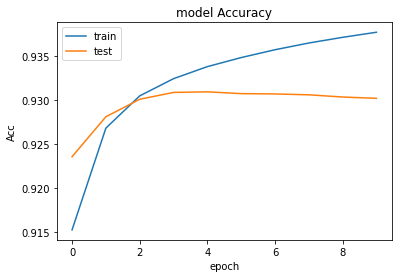

In [84]:
plt.plot(np.sqrt(accs))
plt.plot(np.sqrt(accs_eval))
plt.title('model Accuracy')
plt.ylabel('Acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
preds = []
targets = []
for texts, ys in test_generator:
  #print(texts)
  preds += model(texts.to(device)).squeeze().detach().to('cpu').numpy().tolist()
  targets += ys.numpy().tolist()

In [107]:
print(texts)

tensor([[    0,     0,     0,  ...,     0,     0,     0],
        [ 7342,  1740,     0,  ...,     0,     0,     0],
        [10068,  7973,  7973,  ...,     0,     0,     0],
        ...,
        [12033,  2391, 11460,  ...,     0,     0,     0],
        [13228, 10725,  2159,  ...,     0,     0,     0],
        [ 6891,  8050,  3151,  ...,     0,     0,     0]])


In [86]:
# можно подбирать порог для отнесения к классу хороших предложений
print(classification_report(targets, (np.array(preds) > 0.4).astype(int)))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     56730
         1.0       0.64      0.63      0.63     14050

    accuracy                           0.86     70780
   macro avg       0.77      0.77      0.77     70780
weighted avg       0.85      0.86      0.86     70780



Сохраним наш классификатор:

In [153]:
len(word2id)

14250

In [154]:
model = Clf(14250, 30, 1)
torch.save(model.state_dict(), "clf_simple.pt")

In [ ]:
# load again the model that we saved
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load("clf_simple.pt"))
model.eval()

Теперь можно попробовать с помощью классификаторы отсортировать предложения:

In [90]:
rsl_svo_50.rus.head()

0              Ювелир говорить на жестовом языке цвет.
1    Ювелир говорить на жестовом языке будущие роди...
2          Ювелир говорить на жестовом языке миллиард.
3              Ювелир говорить на жестовом языке ноль.
4              Ювелир говорить на жестовом языке боль.
Name: rus, dtype: object

In [111]:
def preprocess(text):
  tokens = text.lower().split()
  tokens = [token.strip(punctuation) for token in tokens]
  tokens = [token for token in tokens if token]
  return tokens

def prepare_texts_to_pred(data, index):
  # в index будут индексы от 0 до len(rsl_svo_50.rus) = len(data)
  # по ним мы достанем тексты, предобработаем, переведем в векторы, западим и вернем
  tokens = preprocess(data[index]) # токенизируем
  ids = [word2id[token] for token in tokens if token in word2id][:MAX_LEN]
  ids = torch.nn.functional.pad(torch.LongTensor(ids), 
                                (0, MAX_LEN-len(ids)), 
                                mode='constant',
                                value=0)
  return ids

In [92]:
len(rsl_svo_50)  

1454466

In [152]:
with open('good_fake_sentences_rsl_svo_50.tsv', 'w', encoding='utf-8') as f:
  for i in tqdm(range(len(rsl_svo_50[:200000]))):
    sent = prepare_texts_to_pred(rsl_svo_50.rus.to_list(), i)
    single_pred = model(sent.unsqueeze(0).to(device)).detach().to('cpu').numpy().tolist()[0][0]
    if single_pred > 0.25:  # вообще лучший f1-score для класса хороших предожений был на 0.4
      # print(rsl_svo_50.rus.to_list()[i], round(single_pred, 4))
      f.write(rsl_svo_50.rus.to_list()[i] + '\t' + rsl_svo_50.rsl.to_list()[i] + '\n')

100%|██████████| 200000/200000 [2:23:34<00:00, 23.22it/s]


In [139]:
my_preds

[0.09627509862184525,
 0.07262243330478668,
 0.07387848943471909,
 0.07078275829553604,
 0.08435780555009842,
 0.07078275829553604,
 0.13061010837554932,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.0938815176486969,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.11016808450222015,
 0.07078275829553604,
 0.0979285016655922,
 0.07078275829553604,
 0.05958893522620201,
 0.07078275829553604,
 0.1707097589969635,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.050895992666482925,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.1111234724521637,
 0.07078275829553604,
 0.08259177953004837,
 0.07203887403011322,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.07078275829553604,
 0.0707827582